https://www.kaggle.com/coolman/different-classification-techniques-python

In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from hypopt import GridSearch
import warnings; warnings.simplefilter('ignore')

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
import patsy
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import graphviz 
import pydotplus
from IPython.display import Image  
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
Train = pd.read_csv("Training.txt")
Validation = pd.read_csv("Validation.txt")
Test = pd.read_csv("Test.txt")

X_train = Train.iloc[:, 1:6].values
y_train = Train[["Occupancy"]].values

X_val = Validation.iloc[:, 1:6].values
y_val = Validation[["Occupancy"]].values

X_test = Test.iloc[:, 1:6].values
y_test = Test[["Occupancy"]].values

# data = pd.concat([Train, Validation])
data = Train

In [112]:
print(data.shape)
print(Train.shape)
print(Validation.shape)
print(Test.shape)

(8143, 7)
(8143, 7)
(2665, 7)
(9752, 7)


In [113]:
print(Train['Occupancy'].value_counts())
print(6414/(6414+1729))

0    6414
1    1729
Name: Occupancy, dtype: int64
0.7876703917475132


In [114]:
print(Test['Occupancy'].value_counts())
print(7703/(7703+2049))

0    7703
1    2049
Name: Occupancy, dtype: int64
0.7898892534864643


In [115]:
print(Validation['Occupancy'].value_counts())
print(1693/(1693+972))

0    1693
1     972
Name: Occupancy, dtype: int64
0.6352720450281426


In [116]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [117]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [118]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


The light are highly correlated to occupancy

In [119]:
data.cov()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.034119,-0.797365,128.721228,178.963364,1.315394e-04,0.223846
Humidity,-0.797365,30.594295,40.749601,763.274029,4.503209e-03,0.300787
Light,128.721228,40.749601,37929.823503,40648.651609,3.824894e-02,72.272067
CO2,178.963364,763.274029,40648.651609,98797.613643,1.678578e-01,91.558968
HumidityRatio,0.000132,0.004503,0.038249,0.167858,7.264686e-07,0.000105
Occupancy,0.223846,0.300787,72.272067,91.558968,1.046746e-04,0.167266


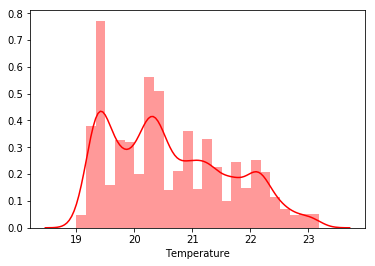

In [120]:
sns.distplot(data['Temperature'], color = 'red')
# plt.subplot(512)
# sns.distplot(data['Humidity'], color = 'green')
# plt.subplot(513)
# sns.distplot(data['Light'], color = 'blue');
# plt.subplot(1, 5, 4)
# sns.distplot(data['CO2'], color = 'yellow');
# plt.subplot(1, 5, 5)
# sns.distplot(data['HumidityRatio'], color = 'purple');

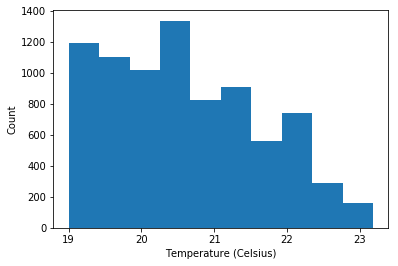

In [132]:
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count')
temp_info = plt.hist(data['Temperature'])

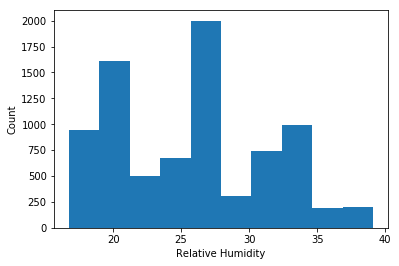

In [133]:
plt.xlabel('Relative Humidity')
plt.ylabel('Count')
temp_info = plt.hist(data['Humidity'])

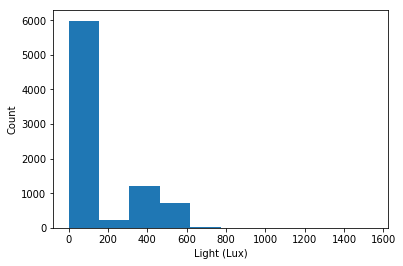

In [134]:
plt.xlabel('Light (Lux)')
plt.ylabel('Count')
temp_info = plt.hist(data['Light'])

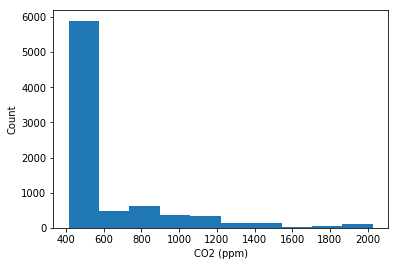

In [135]:
plt.xlabel('CO2 (ppm)')
plt.ylabel('Count')
temp_info = plt.hist(data['CO2'])

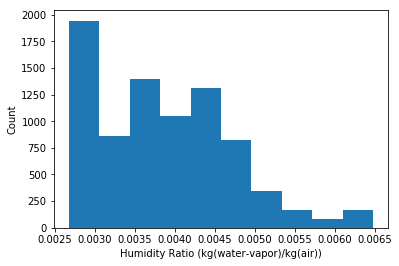

In [136]:
plt.xlabel('Humidity Ratio (kg(water-vapor)/kg(air))')
plt.ylabel('Count')
temp_info = plt.hist(data['HumidityRatio'])

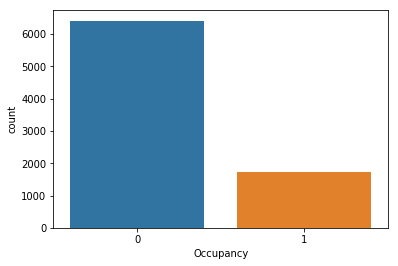

In [126]:
sns.countplot(x=data['Occupancy'], data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e053518>,
      dtype=object)

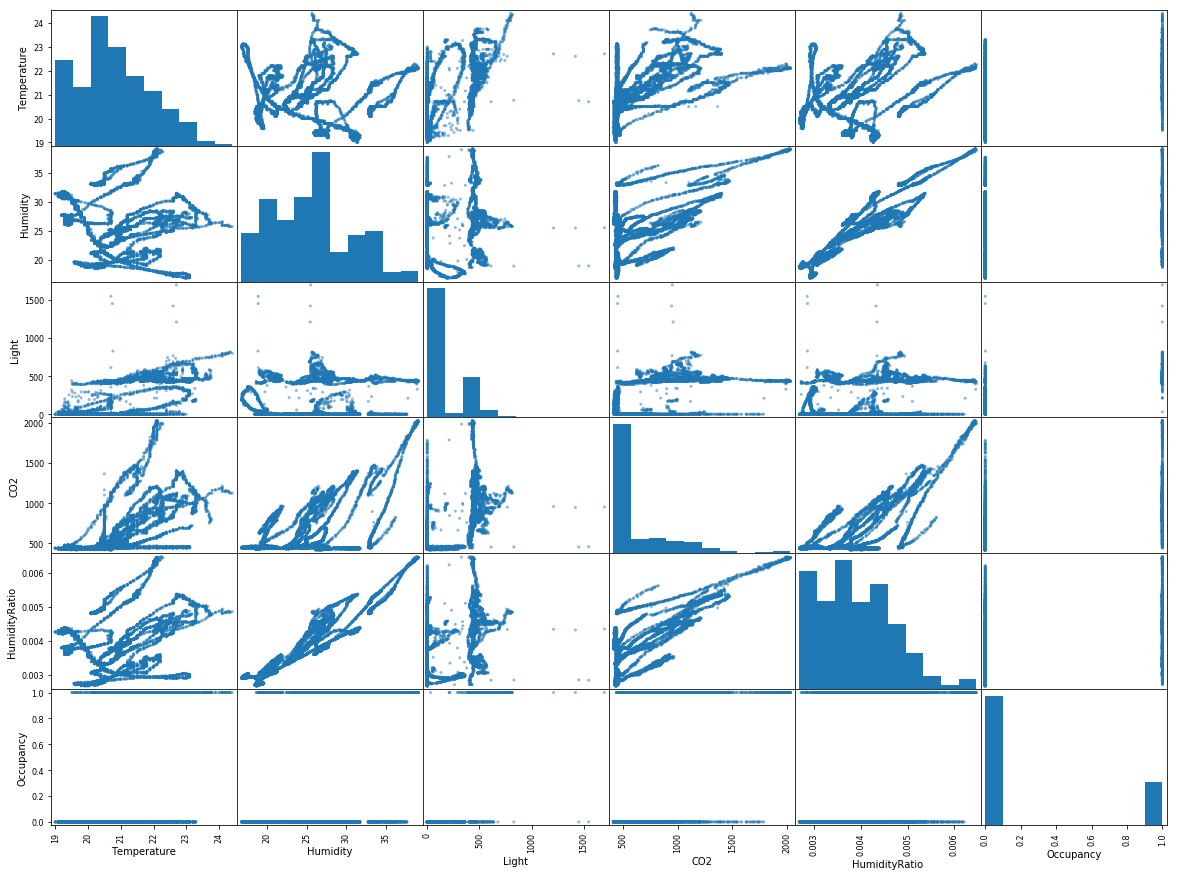

In [56]:
pd.plotting.scatter_matrix(data,figsize=(20, 15))

In [16]:
# pd.plotting.scatter_matrix(data,figsize=(20, 20), diagonal='kde')

In [38]:
def printScore(list):
    for i in list:
        print(i)

# LDA lec4b //supervised

In [17]:
def LDA_val(p):
    LDA = LinearDiscriminantAnalysis(priors = [p, 1-p])
    LDA.fit(X_val, y_val)
    print("----When prior is ", p, "------")
    print("Val accuracy is", accuracy_score(y_val, LDA.predict(X_val)))
    print()

In [18]:
# when prior is 0.3, 0.7
i =0 
while i <= 1:
    LDA_val(i)
    i+=0.1

----When prior is  0 ------
Val accuracy is 0.3647279549718574

----When prior is  0.1 ------
Val accuracy is 0.9793621013133208

----When prior is  0.2 ------
Val accuracy is 0.9789868667917448

----When prior is  0.30000000000000004 ------
Val accuracy is 0.9786116322701689

----When prior is  0.4 ------
Val accuracy is 0.9786116322701689

----When prior is  0.5 ------
Val accuracy is 0.9789868667917448

----When prior is  0.6 ------
Val accuracy is 0.9789868667917448

----When prior is  0.7 ------
Val accuracy is 0.9789868667917448

----When prior is  0.7999999999999999 ------
Val accuracy is 0.9789868667917448

----When prior is  0.8999999999999999 ------
Val accuracy is 0.9789868667917448

----When prior is  0.9999999999999999 ------
Val accuracy is 0.6363977485928706



In [89]:
LDA = LinearDiscriminantAnalysis(priors = [0.3, 0.7])
LDA.fit(X_train, y_train)
print("Train accuracy is", accuracy_score(y_train, LDA.predict(X_train)))
print("Test accuracy is", accuracy_score(y_test, LDA.predict(X_test)))
print("Val accuracy is ", accuracy_score(y_val, LDA.predict(X_val)))
print(classification_report(y_train,LDA.predict(X_train)))
print(classification_report(y_test,LDA.predict(X_test)))
print(classification_report(y_val, LDA.predict(X_val)))

Train accuracy is 0.9801056121822425
Test accuracy is 0.9851312551271534
Val accuracy is  0.9789868667917448
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      6414
          1       0.92      1.00      0.96      1729

avg / total       0.98      0.98      0.98      8143

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      7703
          1       0.94      1.00      0.97      2049

avg / total       0.99      0.99      0.99      9752

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665



# Clustering lec5/ hw5 //unsupervised

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print("Train accuracy is", accuracy_score(y_train, kmeans.predict(X_train)))
print("Test accuracy is", accuracy_score(y_test, kmeans.predict(X_test)))

print(classification_report(y_train,kmeans.predict(X_train)))
print(classification_report(y_test,kmeans.predict(X_test)))

Train accuracy is 0.9464570797003561
Test accuracy is 0.8493642329778507
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      6414
          1       0.86      0.90      0.88      1729

avg / total       0.95      0.95      0.95      8143

             precision    recall  f1-score   support

          0       0.95      0.86      0.90      7703
          1       0.60      0.82      0.70      2049

avg / total       0.87      0.85      0.86      9752



# Decision Tree (Classification Tree)

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [72]:
dt_feature = {'max_depth': [2, 3, 4, 5, 6]}
DT = tree.DecisionTreeClassifier(random_state=0)
clf_dt = GridSearch(model = DT, param_grid = dt_feature)
clf_dt.fit(X_train, y_train, X_val, y_val)
print("Best parameters are", clf_dt.get_best_params())
print("validation accuracy is ", clf_dt.get_best_score())
print("Test accuracy is ", clf_dt.score(X_test, y_test))
print("Train accuracy is ", clf_dt.score(X_train, y_train))

print(classification_report(y_train,clf_dt.predict(X_train)))
print(classification_report(y_test,clf_dt.predict(X_test)))

printScore(clf_dt.get_param_scores())

Best parameters are {'max_depth': 3}
validation accuracy is  0.9782363977485928
Test accuracy is  0.993129614438064
Train accuracy is  0.9891931720496132
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.96      1.00      0.98      1729

avg / total       0.99      0.99      0.99      8143

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752

({'max_depth': 3}, 0.9782363977485928)
({'max_depth': 2}, 0.9782363977485928)
({'max_depth': 4}, 0.9542213883677299)
({'max_depth': 6}, 0.8803001876172608)
({'max_depth': 5}, 0.7936210131332082)


In [85]:
# Create decision tree classifer object
clf_dtree = tree.DecisionTreeClassifier(random_state=0, max_depth = 3)

# Train model
model = clf_dtree.fit(X_train, y_train)

# dot_data = tree.export_graphviz(clf_dtree, out_file=None, 
#                                )

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data) 
# Image(graph.create_png())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## SVM

In [39]:
C_kernel = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['rbf', 'sigmoid'],
            'gamma': ['auto', 'scale']}
svm = SVC(random_state = 0)
clf_svm = GridSearch(model = svm, param_grid = C_kernel)
clf_svm.fit(X_train, y_train, X_val, y_val)
print("Best parameters are", clf_svm.get_best_params())
print("Best validation accuracy is", clf_svm.get_best_score())
print("Test accuracy is", clf_svm.score(X_test, y_test))
printScore(clf_svm.get_param_scores())

Best parameters are {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation accuracy is 0.9121951219512195
Test accuracy is 0.7898892534864643
({'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}, 0.9121951219512195)
({'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}, 0.9121951219512195)
({'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}, 0.9103189493433396)
({'C': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'}, 0.6352720450281426)
({'C': 1e-05, 'gamma': 'scale', 'kernel': 'rbf'}, 0.6352720450281426)
({'C': 1e-06, 'gamma': 'auto', 'kernel': 'sigmoid'}, 0.6352720450281426)
({'C': 1e-06, 'gamma': 'scale', 'kernel': 'rbf'}, 0.6352720450281426)
({'C': 1e-06, 'gamma': 'scale', 'kernel': 'sigmoid'}, 0.6352720450281426)
({'C': 1e-05, 'gamma': 'auto', 'kernel': 'rbf'}, 0.6352720450281426)
({'C': 1e-05, 'gamma': 'auto', 'kernel': 'sigmoid'}, 0.6352720450281426)
({'C': 0.0001, 'gamma': 'auto', 'kernel': 'rbf'}, 0.6352720450281426)
({'C': 1e-05, 'gamma': 'scale', 'kernel': 'sigmoid'}, 0.635272045028142

# Random Forest

In [40]:
tree_feature = {'n_estimators': [5, 10, 20, 50, 100, 200, 500, 1000],
               'max_features': [1, 2, 3, 4, 5]}
RF = RandomForestClassifier(random_state=0)
clf_RF = GridSearch(model = RF, param_grid = tree_feature)
clf_RF.fit(X_train, y_train, X_val, y_val)
print("Best parameters are", clf_RF.get_best_params())
print("Best validation accuracy is", clf_RF.get_best_score())
print("Test accuracy is", clf_RF.score(X_test, y_test))

printScore(clf_RF.get_param_scores())

Best parameters are {'max_features': 1, 'n_estimators': 100}
Best validation accuracy is 0.9636022514071294
Test accuracy is 0.9787735849056604
({'max_features': 1, 'n_estimators': 100}, 0.9636022514071294)
({'max_features': 4, 'n_estimators': 5}, 0.9587242026266416)
({'max_features': 1, 'n_estimators': 200}, 0.9564727954971858)
({'max_features': 1, 'n_estimators': 1000}, 0.9560975609756097)
({'max_features': 1, 'n_estimators': 500}, 0.9557223264540338)
({'max_features': 1, 'n_estimators': 50}, 0.9549718574108818)
({'max_features': 4, 'n_estimators': 10}, 0.9538461538461539)
({'max_features': 1, 'n_estimators': 20}, 0.950844277673546)
({'max_features': 2, 'n_estimators': 500}, 0.9500938086303939)
({'max_features': 4, 'n_estimators': 20}, 0.9500938086303939)
({'max_features': 2, 'n_estimators': 1000}, 0.949718574108818)
({'max_features': 3, 'n_estimators': 100}, 0.949343339587242)
({'max_features': 2, 'n_estimators': 100}, 0.949343339587242)
({'max_features': 3, 'n_estimators': 200}, 0.

## Boosting

In [96]:
GBC_param = {"learning_rate": [0.0001, 0.001, 0.01, 0.1, 1, 2],
            "n_estimators": [10, 100, 1000],
            "max_depth": [1, 2, 3, 4, 5]}
GBC = GradientBoostingClassifier(random_state=0)
clf_GBC = GridSearch(model = GBC, param_grid = GBC_param)
clf_GBC.fit(X_train, y_train, X_val, y_val)
print("Best parameters are", clf_GBC.get_best_params())
print("Best validation accuracy is", clf_GBC.get_best_score())
print("Test accuracy is", clf_GBC.score(X_test, y_test))


printScore(clf_GBC.get_param_scores())

Best parameters are {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
Best validation accuracy is 0.9786116322701689
Test accuracy is 0.993129614438064
({'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}, 0.9786116322701689)
({'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}, 0.9786116322701689)
({'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 1000}, 0.9786116322701689)
({'learning_rate': 1, 'max_depth': 1, 'n_estimators': 100}, 0.9782363977485928)
({'learning_rate': 1, 'max_depth': 1, 'n_estimators': 10}, 0.9782363977485928)
({'learning_rate': 1, 'max_depth': 1, 'n_estimators': 1000}, 0.9782363977485928)
({'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}, 0.9782363977485928)
({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}, 0.9782363977485928)
({'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 0.9782363977485928)
({'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}, 0.974484052532833)
({'learning_rate': 

## Logistic Regression

In [92]:
C = {'C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
LR = LogisticRegression(random_state=0)
clf_LR = GridSearch(model = LR, param_grid = C)
clf_LR.fit(X_train, y_train, X_val, y_val)
print("Best parameters are", clf_LR.get_best_params())
print("Best validation accuracy is", clf_LR.get_best_score())
print("Test accuracy is", clf_LR.score(X_test, y_test))

printScore(clf_LR.get_param_scores())

Best parameters are {'C': 1e-06}
Best validation accuracy is 0.9793621013133208
Test accuracy is 0.9535479901558654
({'C': 1e-06}, 0.9793621013133208)
({'C': 1e-05}, 0.9789868667917448)
({'C': 100}, 0.9782363977485928)
({'C': 10}, 0.9782363977485928)
({'C': 1}, 0.9782363977485928)
({'C': 0.1}, 0.9782363977485928)
({'C': 0.01}, 0.9782363977485928)
({'C': 0.001}, 0.9782363977485928)
({'C': 0.0001}, 0.9782363977485928)


# Linear Regression X 

https://towardsdatascience.com/why-linear-regression-is-not-suitable-for-binary-classification-c64457be8e28

In [97]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

prediction_train = [0 if i <= 0.5 else 1 for i in model.predict(X_train)]
prediction_test = [0 if i <= 0.5 else 1 for i in model.predict(X_test)]
print("Train accuracy is", accuracy_score(y_train, prediction_train))
print("Test accuracy is", accuracy_score(y_test, prediction_test))

# print(classification_report(y_train,model.predict(X_train)))
# print(classification_report(y_test,model.predict(X_test)))

Train accuracy is 0.9879651234188874
Test accuracy is 0.9881050041017228
